![](MSU_Hollow_Earth_Society_Logo.jpg)

########################################################################
## MSU Hollow Earth Society: 
### Joe Epley, Elias Taira, Erin Syerson, Michael Bellaver
#### AST 304, Fall 2020
#### Michigan State University
########################################################################

In [9]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# importing solving methods
from ode import *
from kepler import *

## Q4.

In [10]:
# setting initial conditions
m = 1
a = 1
e = .5
z0, eps0, Tperiod = set_initial_conditions(a, m, e)

In [11]:
# generating the list of step sizes
hlist = []
for i in range(0,10+1):
    h_new = 0.1*Tperiod / 2**i
    hlist.append(h_new)

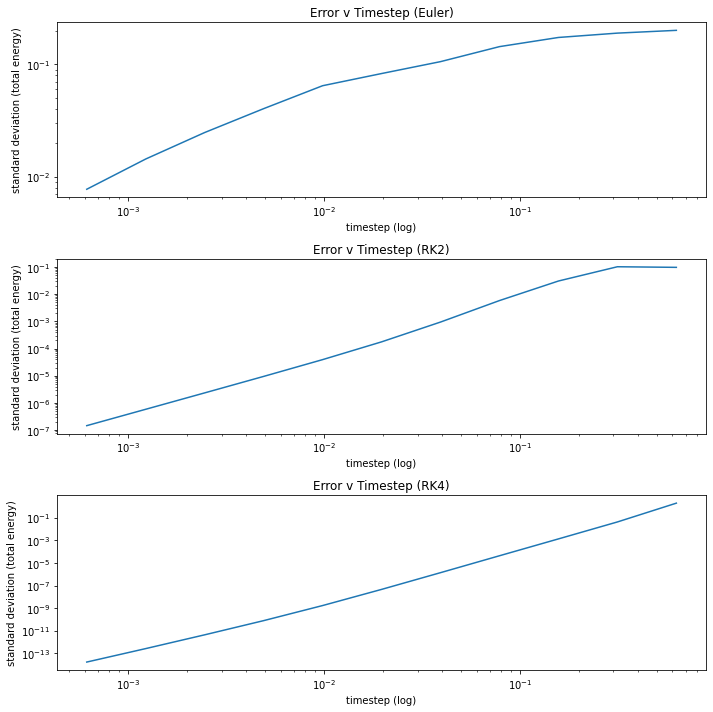

In [13]:
import matplotlib.pyplot as plt

method_list = ["Euler","RK2","RK4"]

fig, ax = plt.subplots(3,1, figsize = [10,10])

# plotting the standard deviation as a function of energy
# for each of the different methods
for i, method in enumerate(method_list):
    errlist = []
    # generates plot for each method
    for h in hlist:
        tend = 3*Tperiod
        # running integrate method for each h value
        ts, Xs, Ys, KEs, PEs, TEs = integrate_orbit(z0, m, tend, h, method)
        err = np.std(TEs)
        errlist.append(err)
    # setting plot attriutes
    ax[i].plot(hlist,errlist)
    ax[i].set_title(f'Error v Timestep ({method})')
    ax[i].set_xlabel('timestep (log)')
    ax[i].set_ylabel('standard deviation (total energy)')
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
plt.tight_layout()

*It should be noted that we calculated our error by looking at the standard deviation of the total energy since the total energy should be constant and any deviation from that constant quantity is most likely a result of some kind of error in the numerical method.*

Yes, the error does scale as expected. As we decrease the size of h, the space between each iteration becomes smaller, allowing the methods to create more accurate results. We also see that for each of the methods we use, the error decreases at a greater rate we move from Euler to RK2 to RK4, which is also an expected behavior. When plotting, we found that it was better to use a logarithmic scale as the plot formed a straighter line once we rescaled it.

## Question 5

### Trajectories

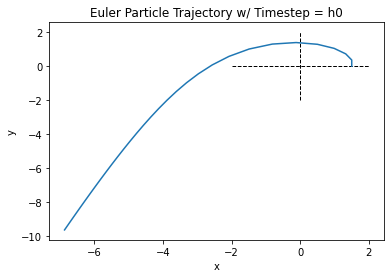

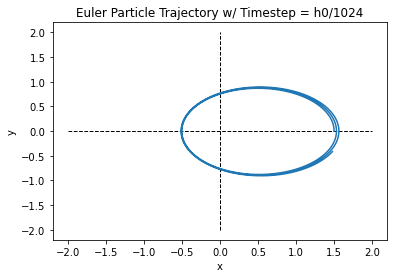

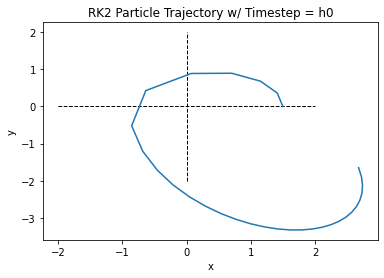

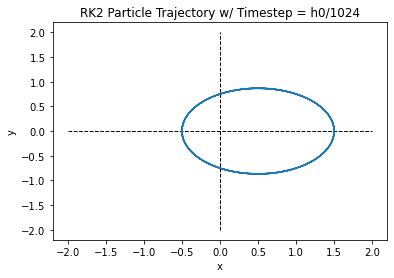

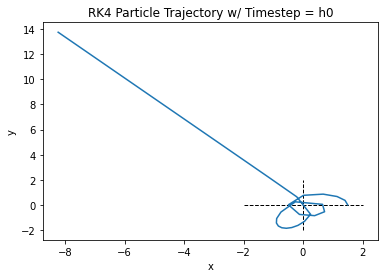

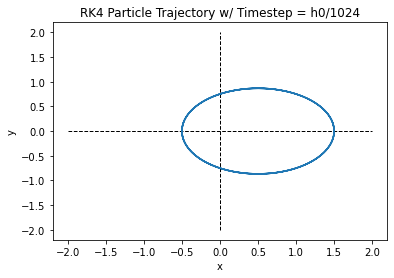

In [14]:
# setting variables and selecting the largest and smallest time steps 
tend = Tperiod*3
h_plot = [hlist[0], hlist[-1]]
timestep = ['h0', 'h0/1024']

# plotting the two plots of position for the different timesteps using Euler
for j in range(len(h_plot)):
    ts, Xs, Ys, KEs, PEs, TEs = integrate_orbit(z0, m, tend, h_plot[j], 'Euler')
    #creates grid on the plot to help visualize the axes of the elipse
    hline_y=[0.0,0.0]
    hline_x=[-2*a,2*a]
    vline_y=[-2*a,2*a]
    vline_x=[0,0]

    plt.figure()
    plt.plot(hline_x,hline_y,linestyle='--',color='k',marker=None,lw=1)
    plt.plot(vline_x,vline_y,linestyle='--',color='k',marker=None,lw=1)
    plt.plot(Xs,Ys)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Euler Particle Trajectory w/ Timestep = '+timestep[j])
    
# plotting the two plots of position for the different timesteps using RK2
for j in range(len(h_plot)):
    ts, Xs, Ys, KEs, PEs, TEs = integrate_orbit(z0, m, tend, h_plot[j], 'RK2')
    #creates grid on the plot to help visualize the axes of the elipse
    hline_y=[0.0,0.0]
    hline_x=[-2*a,2*a]
    vline_y=[-2*a,2*a]
    vline_x=[0,0]
    
    plt.figure()
    plt.plot(hline_x,hline_y,linestyle='--',color='k',marker=None,lw=1)
    plt.plot(vline_x,vline_y,linestyle='--',color='k',marker=None,lw=1)
    plt.plot(Xs,Ys)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('RK2 Particle Trajectory w/ Timestep = '+timestep[j])
    
# plotting the two plots of position for the different timesteps using RK4
for j in range(len(h_plot)):
    ts, Xs, Ys, KEs, PEs, TEs = integrate_orbit(z0, m, tend, h_plot[j], 'RK4')
    #creates grid on the plot to help visualize the axes of the elipse
    hline_y=[0.0,0.0]
    hline_x=[-2*a,2*a]
    vline_y=[-2*a,2*a]
    vline_x=[0,0]

    plt.figure()
    plt.plot(hline_x,hline_y,linestyle='--',color='k',marker=None,lw=1)
    plt.plot(vline_x,vline_y,linestyle='--',color='k',marker=None,lw=1)
    plt.plot(Xs,Ys)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('RK4 Particle Trajectory w/ Timestep = '+timestep[j])

The orbit closes only when the the h is low enough, and it is using the Runge-Kutta methods. When closed, the orbit is an elipse with a semi-major axis of 1, which is shown by seeing that the max x position is 1.5 and the minimum x position is -0.5, which makes the semi-major axis (1.5+0.5)/2 = 1.

### Energies

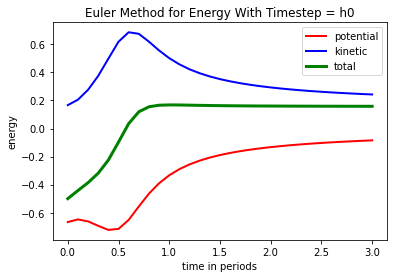

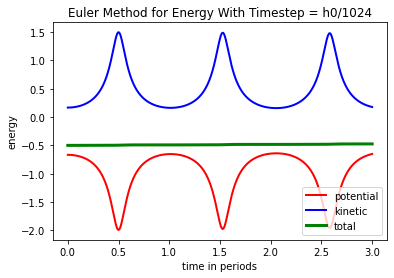

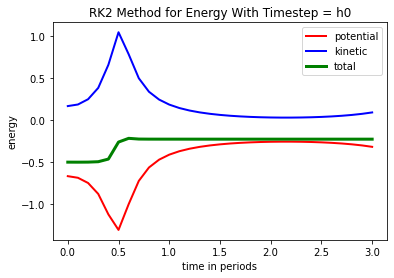

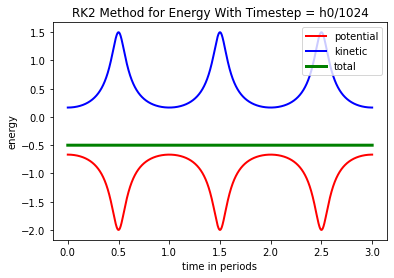

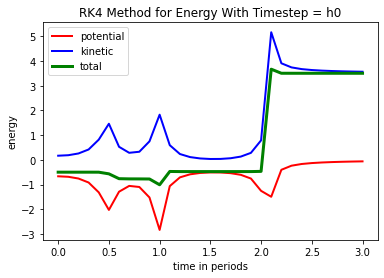

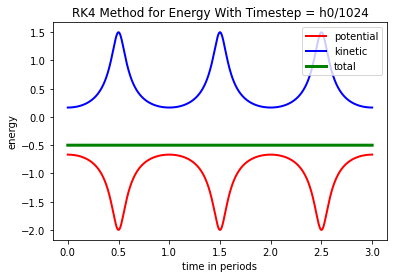

In [15]:
# re-selecting the time-steps, even though they didn't change 
h_plot = [hlist[0], hlist[-1]]
timestep = ['h0', 'h0/1024']

# plotting the two plots of energy for the euler method
for j in range(len(h_plot)):

    """
    This FOR loop interated through the two step sizes selected and plots a graph 
    of the kinetic, potential, and total energy for euler method
    """

    tend = 3*Tperiod
    ts, Xs, Ys, KEs, PEs, TEs = integrate_orbit(z0, m, tend, h_plot[j], 'Euler')

    plt.figure()
    plt.plot(ts/Tperiod,PEs,linestyle='-',color='red',lw=2, label = 'potential')
    plt.plot(ts/Tperiod,KEs,linestyle='-',color='blue',lw=2, label = 'kinetic')
    plt.plot(ts/Tperiod,PEs+KEs,linestyle='-',color='green',lw=3, label = 'total')
    plt.title('Euler Method for Energy With Timestep = '+timestep[j])
    plt.xlabel('time in periods')
    plt.ylabel('energy')
    plt.legend()

# plotting the two plots of energy for the RK2 method
for j in range(len(h_plot)):

    """
    This FOR loop interated through the two step sizes selected and plots a graph 
    of the kinetic, potential, and total energy for the RK2 method
    """ 

    tend = 3*Tperiod
    ts, Xs, Ys, KEs, PEs, TEs = integrate_orbit(z0, m, tend, h_plot[j], 'RK2')

    plt.figure()
    plt.plot(ts/Tperiod,PEs,linestyle='-',color='red',lw=2, label = 'potential')
    plt.plot(ts/Tperiod,KEs,linestyle='-',color='blue',lw=2, label = 'kinetic')
    plt.plot(ts/Tperiod,PEs+KEs,linestyle='-',color='green',lw=3, label = 'total')
    plt.title('RK2 Method for Energy With Timestep = '+timestep[j])
    plt.xlabel('time in periods')
    plt.ylabel('energy')
    plt.legend()

# plotting the two plots of energy for the RK4 method
for j in range(len(h_plot)):

    """
    This FOR loop interated through the two step sizes selected and plots a graph 
    of the kinetic, potential, and total energy for the RK4 method
    """

    tend = 3*Tperiod
    ts, Xs, Ys, KEs, PEs, TEs = integrate_orbit(z0, m, tend, h_plot[j], 'RK4')

    plt.figure()
    plt.plot(ts/Tperiod,PEs,linestyle='-',color='red',lw=2, label = 'potential')
    plt.plot(ts/Tperiod,KEs,linestyle='-',color='blue',lw=2, label = 'kinetic')
    plt.plot(ts/Tperiod,PEs+KEs,linestyle='-',color='green',lw=3, label = 'total')
    plt.title('RK4 Method for Energy With Timestep = '+timestep[j])
    plt.xlabel('time in periods')
    plt.ylabel('energy')
    plt.legend()